In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

<font size="5">**Question 1**

**a)** Decision boundary is $w_0+w_1x_1+w_2x_2=0$ so $x_2=\frac{-w_1}{w_2}x_1-\frac{w_0}{w_2}$ so we have $a=\frac{-w_1}{w_2}$, $b=\frac{-w_0}{w_2}$

**b)** Choosing the target function.

Let $f=2x_1-5x_2+4$

Generating random data points and labeling them according to our target function.

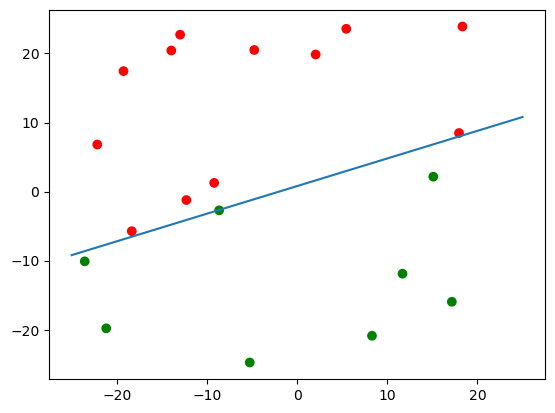

In [2]:
np.random.seed(43)
k_1=2
k_2=-5
k_0=4

dataset_x=np.random.uniform(-25,25,20)
dataset_y=np.random.uniform(-25,25,20)
dataset=np.column_stack((dataset_x,dataset_y))

results=list(map(lambda x: np.sign(k_1*x[0]+k_2*x[1]+k_0),dataset))

results=np.array(results)
colors=np.where(results >0,'green','red')
plt.scatter(dataset_x,dataset_y,c=colors)
x=np.linspace(-25,25,100)
y=((-k_1)/k_2)*x-(k_0)/k_2

plt.plot(x,y)

plt.show()

**c) Perceptron learning algorithm**

Number of updates required = 18


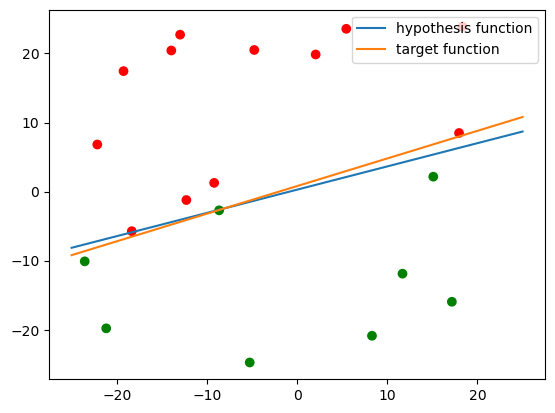

In [3]:
weight=np.zeros(3)
finished=False
updates=0
while finished==False:
  finished=True
  for i in range(20):
    datapoint=np.array([1,dataset[i][0],dataset[i][1]])
    if (np.sign(np.dot(datapoint,weight))*results[i] <= 0):
      weight=weight+results[i]*datapoint
      finished=False
      updates+=1
      break

plt.scatter(dataset_x,dataset_y,c=colors)

x=np.linspace(-25,25,100)
y_2=(-weight[1])/weight[2]*x-weight[0]/weight[2]
plt.plot(x,y_2,label='hypothesis function')
y=((-k_1)/k_2)*x-(k_0)/k_2
plt.plot(x,y,label='target function')
plt.legend(loc="upper right")

print("Number of updates required =",updates)

We can see that perceptron learning algorithm worked well and found a close hypothesis function.

**d)** Same as before but with 1000 data points.

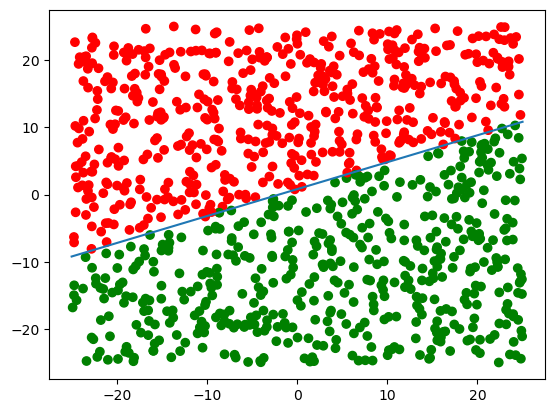

In [4]:
np.random.seed(43)
k_1=2
k_2=-5
k_0=4

dataset_x_1000=np.random.uniform(-25,25,1000)
dataset_y_1000=np.random.uniform(-25,25,1000)
dataset_1000=np.column_stack((dataset_x_1000,dataset_y_1000))

results=list(map(lambda x: np.sign(k_1*x[0]+k_2*x[1]+k_0),dataset_1000))

results=np.array(results)
colors=np.where(results >0,'green','red')
plt.scatter(dataset_x_1000,dataset_y_1000,c=colors)
x=np.linspace(-25,25,100)
y=((-k_1)/k_2)*x-(k_0)/k_2

plt.plot(x,y)

plt.show()

Perceptron learning algorithm for 1000 data points.

Number of required updates = 63614


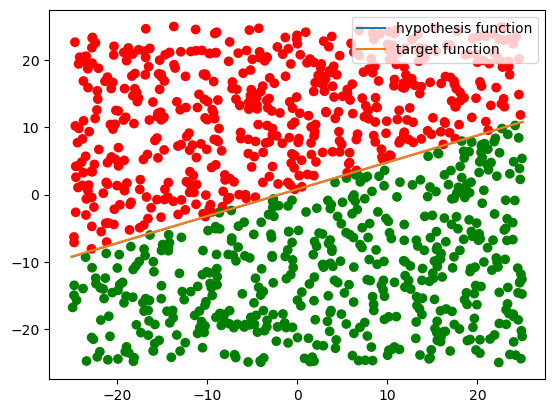

In [5]:
weight=np.zeros(3)

finished=False
updates=0
while finished==False:
  finished=True
  for i in range(1000):
    datapoint=np.array([1,dataset_1000[i][0],dataset_1000[i][1]])
    if (np.sign(np.dot(datapoint,weight))*results[i] <= 0):
      weight=weight+results[i]*datapoint
      finished=False
      updates+=1
      break
print("Number of required updates =",updates)
plt.scatter(dataset_x_1000,dataset_y_1000,c=colors)
x=np.linspace(-25,25,100)
y_2=(-weight[1])/weight[2]*x-weight[0]/weight[2]
plt.plot(x,y_2,label="hypothesis function")
y=((-k_1)/k_2)*x-(k_0)/k_2

plt.plot(x,y,label="target function")
plt.legend(loc="upper right")
plt.show()

We can see that PLA took 18 updates for the 20 data points and 63614 updates for the 1000 data points. The reason for that is with more points there are several points very close to target function and the number of steps for convergence is proportional to inverse square of the minimum distance.

Note that the reason for blue line not being visible is that the two lines are very close to each other.

<font size="5">**Question 2**

**a)** Opening the images and turning them into grayscale and flattening them.

In [6]:
orientations_train=np.load("orientations_train.npy")

X= np.zeros((10000,4096))

for i in range(10000):
    x= Image.open("3dshapes_train/"+str(i)+".jpg")
    y= ImageOps.grayscale(x)
    image_array= np.array(y)
    flattened_array=image_array.flatten()
    X[i]=flattened_array

    
   

**b)** Since linear regression has a closed form solution, the training only consists of matrix multiplication. 
We used the regularized version with $\lambda=1$. So $w^{*}=(X^TX+\lambda I)^{-1}X^Tt$

In [7]:
Id = np.identity(4096)
trained_weights= np.dot(np.dot(np.linalg.inv(np.add(np.dot(X.transpose(),X),Id)),X.transpose()),orientations_train.transpose())
print(trained_weights.shape,X.shape)

(4096,) (10000, 4096)


Now we test our model.

In [8]:
orientations_test=np.load("orientations_test.npy")
predictions=np.zeros(1000)
for i in range(1000):
    x= Image.open("3dshapes_test/"+str(i)+".jpg")
    y= ImageOps.grayscale(x)
    image_array= np.array(y)
    flattened_array=image_array.flatten()
    predictions[i]=np.dot(flattened_array,trained_weights)

#print(predictions[:5])   

RMSE=np.sqrt(np.mean((orientations_test-predictions)**2))
print("RMSE =",RMSE)

RMSE = 0.0824222344134181


**c)** We speculated that certain portions of the image were more impactful on the orientation. So we used those parts as our feature. 

In [9]:
G= np.zeros((10000,360))

for i in range(10000):
    x= Image.open("3dshapes_train/"+str(i)+".jpg")
    y= ImageOps.grayscale(x)
    image_array= np.array(y)
    # portions of the image we used as feature
    crop_left=image_array[12:30,0:10]  
    crop_right=image_array[12:30,54:64] 
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    G[i]=flattened_crop

Id_360 = np.identity(360)
latest_weights= np.dot(np.dot(np.linalg.inv(np.add(np.dot(G.transpose(),G),Id_360)),G.transpose()),orientations_train.transpose())
latest_predictions=np.zeros(1000)

for i in range(1000):
    x= Image.open("3dshapes_test/"+str(i)+".jpg")
    y= ImageOps.grayscale(x)
    image_array= np.array(y)
    crop_left=image_array[12:30,0:10]
    crop_right=image_array[12:30,54:64]
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    latest_predictions[i]=np.dot(flattened_crop,latest_weights)
  

#print(latest_predictions[:5])
RMSE=np.sqrt(np.mean((orientations_test-latest_predictions)**2))
print("RMSE =",RMSE)    

RMSE = 0.11228553757681264


RMSE got slightly worse from 0.08 to 0.11. We think that it is mostly related to decrease in the size of the data we use. We decreased the size from 4096 to 360. We also observed that using other portions of the image with similar sizes did not yield good results. This indicates that the portions of the image that we chose are more valuable. The green parts on the image shows our feature.
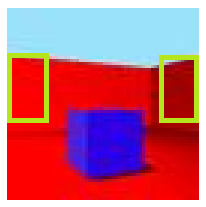

<font size="5"> **Question 3**

**a & b)** We first extracted symmetry and intensity features then we plot the data points by their symmetry and intensity.

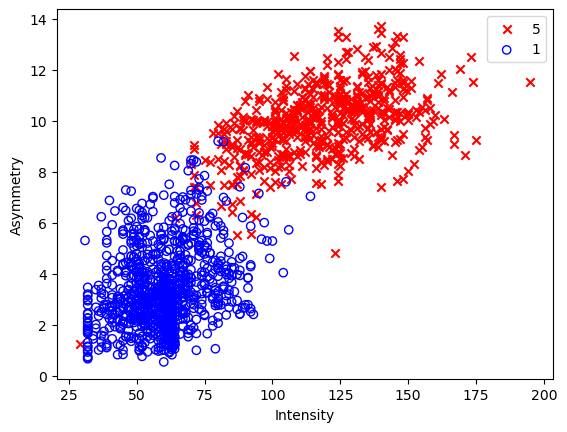

In [10]:
train_data=np.load("train_data.npy")
train_labels=np.load("train_labels.npy")

def sigmoid(x):
    return 1/(1+np.exp(-x))
      
intensity=np.zeros(1561)
asymmetry=np.zeros(1561)
for i in range(len(train_data)):
    black_pixels=0
    for grayscale in train_data[i]:
        if grayscale!=-1:
            black_pixels+=1
    intensity[i]=black_pixels
    
for i in range(len(train_data)):
    asymmetry_measure=0
    for j in range(256):
        asymmetry_measure+=(train_data[i][32*int(j/16)+15-j]-train_data[i][j])**2/2
    asymmetry[i]=np.sqrt(asymmetry_measure)

intensity_1=np.array([])
intensity_2=np.array([])
asymmetry_1=np.array([])
asymmetry_2=np.array([])
for i in range(len(train_labels)):
    if(train_labels[i]==-1):
        intensity_1=np.append(intensity_1,intensity[i])
        asymmetry_1=np.append(asymmetry_1,asymmetry[i])
    else:
        intensity_2=np.append(intensity_2,intensity[i])
        asymmetry_2=np.append(asymmetry_2,asymmetry[i])


plt.scatter(intensity_1,asymmetry_1,marker='x',color='red',label='5')
plt.scatter(intensity_2,asymmetry_2,marker='o',facecolor='none',edgecolor='blue',label='1')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Asymmetry')
plt.show()


**c)** $$\nabla_{w}E(w)=\frac{1}{N}\sum_{i=1}^{N}\frac{(-y_{i}x_{i})e^{-y_{i}w^{T}x_{i}}}{1+e^{-y_{i}w^{T}x_i}}=\frac{1}{N}\sum_{i=1}^{N}\frac{(-y_{i}x_{i})}{1+e^{y_{i}w^{T}x_i}}$$ 

We used full batch gradient descent with momentum and learning rate = 0.02 in our optimizer. Training stops when the norm of  the gradient is small enough.

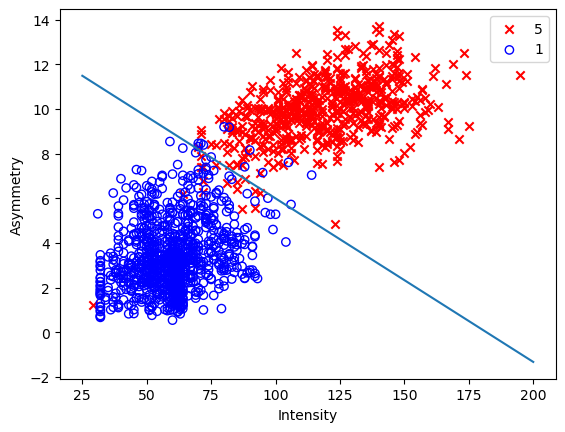

Training error (E_in) =   0.05092205239002318 
Training classification accuracy =  0.9814221652786675


In [11]:
mu=0
sigma=0.01
eta=0.02
np.random.seed(73)
momentum=np.zeros(3)
logistic_weights=np.random.normal(mu,sigma,3)
data_firstrow=np.ones(len(train_data))
data=np.vstack((data_firstrow,intensity,asymmetry))


while(True):
    summ=np.zeros(3)
    for i in range(len(train_data)):
        summ+=(data[:,i]*(-train_labels[i]))/(1+np.exp(np.dot(data[:,i],logistic_weights.transpose())*(+train_labels[i])))
    gradient=summ/len(train_data)
    momentum=0.9*momentum-gradient*eta
    logistic_weights+= momentum
    if(np.linalg.norm(gradient)<10**(-3)):
        break

        
plt.scatter(intensity_1,asymmetry_1,marker='x',color='red',label='5')
plt.scatter(intensity_2,asymmetry_2,marker='o',facecolor='none',edgecolor='blue',label='1')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Asymmetry')
x=np.linspace(25,200,100)
y_2=(-logistic_weights[1])/logistic_weights[2]*x-logistic_weights[0]/logistic_weights[2]
plt.plot(x,y_2)
plt.show()  
train_errors=0
train_loss=0
for i in range(len(train_data)):
    train_loss+=np.log(1+np.exp((-train_labels[i])*np.dot(data[:,i],logistic_weights.transpose())))
    if(sigmoid(np.dot(data[:,i],logistic_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=train_labels[i]):
        train_errors+=1
print("Training error (E_in) =  ",train_loss/len(train_data),"\nTraining classification accuracy = ", 1-train_errors/len(train_data))
                                                                                                                         



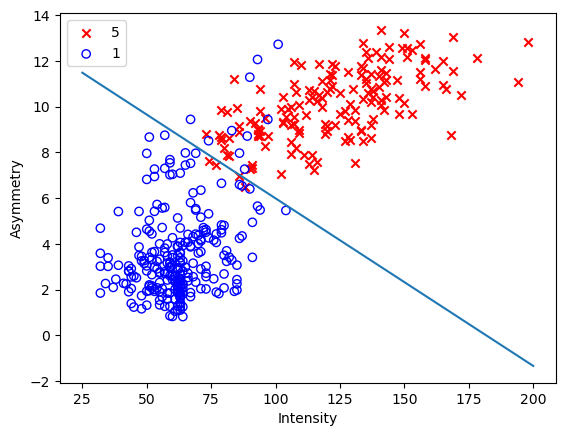

Test error (E_test) =  0.1264472011249236 
Test classification accuracy =  0.9669811320754716


In [12]:
test_data=np.load("test_data.npy")
test_labels=np.load("test_labels.npy")


Test_intensity=np.zeros(len(test_data))
Test_asymmetry=np.zeros(len(test_data))
for i in range(len(test_data)):
    black_pixels=0
    for grayscale in test_data[i]:
        if grayscale!=-1:
            black_pixels+=1
    Test_intensity[i]=black_pixels
    
for i in range(len(test_data)):
    asymmetry_measure=0
    for j in range(256):
        asymmetry_measure+=(test_data[i][32*int(j/16)+15-j]-test_data[i][j])**2/2
    Test_asymmetry[i]=np.sqrt(asymmetry_measure)

Test_intensity_1=np.array([])
Test_intensity_2=np.array([])
Test_asymmetry_1=np.array([])
Test_asymmetry_2=np.array([])
for i in range(len(test_labels)):
    if(test_labels[i]==-1):
        Test_intensity_1=np.append(Test_intensity_1,Test_intensity[i])
        Test_asymmetry_1=np.append(Test_asymmetry_1,Test_asymmetry[i])
    else:
        Test_intensity_2=np.append(Test_intensity_2,Test_intensity[i])
        Test_asymmetry_2=np.append(Test_asymmetry_2,Test_asymmetry[i])


plt.scatter(Test_intensity_1,Test_asymmetry_1,marker='x',color='red',label='5')
plt.scatter(Test_intensity_2,Test_asymmetry_2,marker='o',facecolor='none',edgecolor='blue',label='1')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Asymmetry')
x=np.linspace(25,200,100)
y_2=(-logistic_weights[1])/logistic_weights[2]*x-logistic_weights[0]/logistic_weights[2]
plt.plot(x,y_2)
plt.show()

test_errors=0
test_loss=0
for i in range(len(test_data)):
    test_asymmetry=0
    test_intensity=0
    for j in range(256):
        test_asymmetry+=(test_data[i][32*int(j/16)+15-j]-test_data[i][j])**2/2
        if(test_data[i][j]!=-1):
            test_intensity+=1
    test_datapoint=np.array([1,test_intensity,np.sqrt(test_asymmetry)])
    test_loss+=np.log(1+np.exp((-test_labels[i])*np.dot(test_datapoint,logistic_weights.transpose())))
    if(sigmoid(np.dot(test_datapoint,logistic_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=test_labels[i]):
        test_errors+=1
print("Test error (E_test) = ", test_loss/len(test_data),"\nTest classification accuracy = ", 1-test_errors/len(test_data)) 

**d)** Here we use cross-validation to find a good lambda.

In [13]:
np.random.seed(51)

permutation_indices = np.random.permutation(1561)
shuffled_train=train_data[permutation_indices]
shuffled_labels=train_labels[permutation_indices]

partitions=[list(range(313)),list(range(313,625)),list(range(625,937)),list(range(937,1249)),list(range(1249,1561))]
Lambdas=[0.005,0.01,0.1,1,10]




for i in range(5):
    validation_momentum=np.zeros(256)
    validation_weights=np.random.normal(mu,sigma,256)
    validation_errors=0
    training_indices=partitions[(i+1)%5]+partitions[(i+2)%5]+partitions[(i+3)%5]+partitions[(i+4)%5]
    while(True):
        validation_summ=np.zeros(256)
        for j in training_indices:
            validation_summ+=(shuffled_train[j]*(-shuffled_labels[j]))/(1+np.exp(np.dot(shuffled_train[j],validation_weights.transpose())*(shuffled_labels[j])))+2*Lambdas[i]*validation_weights
        validation_gradient=validation_summ/(len(train_data)-len(partitions[i%5]))
        validation_momentum=0.9*validation_momentum-validation_gradient*eta
        validation_weights += validation_momentum
        if(np.linalg.norm(validation_gradient)<10**(-4)):
            break
    for k in partitions[i%5]:
        if(sigmoid(np.dot(shuffled_train[k],validation_weights.transpose()))>0.5):
            predicted_label=1
        else:
            predicted_label=-1
        if(predicted_label!=shuffled_labels[k]):
            validation_errors+=1
    print("Validation missclassifications for lambda =",Lambdas[i],"is",validation_errors)

Validation missclassifications for lambda = 0.005 is 1
Validation missclassifications for lambda = 0.01 is 1
Validation missclassifications for lambda = 0.1 is 3
Validation missclassifications for lambda = 1 is 6
Validation missclassifications for lambda = 10 is 48


We observe that $\lambda=0.01$ seems more appropriate. $\lambda=0.005$ has the same missclassifications but slower and the other $\lambda$ has more missclassifications.

So we train the model with $\lambda=0.01$ first and $\lambda=0$ later to see the effect of regularization.

In [14]:
np.random.seed(49)
Lambda = 0.01

regularized_train_momentum=np.zeros(256)
regularized_train_weights=np.random.normal(mu,sigma,256)


while(True):
        regularized_train_summ=np.zeros(256)
        for j in range(len(train_data)):
            regularized_train_summ+=(train_data[j]*(-train_labels[j]))/(1+np.exp(np.dot(train_data[j],regularized_train_weights.transpose())*(train_labels[j])))+2*Lambda*regularized_train_weights
        regularized_train_gradient=regularized_train_summ/len(train_data)
        regularized_train_momentum=0.9*regularized_train_momentum-regularized_train_gradient*eta
        regularized_train_weights += regularized_train_momentum
        if(np.linalg.norm(regularized_train_gradient)<10**(-4)):
            break
            
regularized_train_errors=0
for i in range(len(train_data)):
    if(sigmoid(np.dot(train_data[i],regularized_train_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=train_labels[i]):
        regularized_train_errors+=1
print( "Regularized training classification accuracy with regularization = ", 1-regularized_train_errors/len(train_data))

regularized_test_errors=0
for i in range(len(test_data)):
    if(sigmoid(np.dot(test_data[i],regularized_train_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=test_labels[i]):
        regularized_test_errors+=1
print( " Test classification accuracy with regularization = ", 1-regularized_test_errors/len(test_data))

Regularized training classification accuracy with regularization =  0.9993593850096092
 Test classification accuracy with regularization =  0.9905660377358491


In [15]:
np.random.seed(12)
Lambda=0
train_momentum=np.zeros(256)
train_weights=np.random.normal(mu,sigma,256)
while(True):
        train_summ=np.zeros(256)
        for j in range(len(train_data)):
            train_summ+=(train_data[j]*(-train_labels[j]))/(1+np.exp(np.dot(train_data[j],train_weights.transpose())*(train_labels[j])))+2*Lambda*regularized_train_weights
        train_gradient=train_summ/len(train_data)
        train_momentum=0.9*train_momentum-train_gradient*eta
        train_weights += train_momentum
        if(np.linalg.norm(train_gradient)<10**(-3)):
            break

train_errors=0
for i in range(len(train_data)):
    if(sigmoid(np.dot(train_data[i],train_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=train_labels[i]):
        train_errors+=1
print(" Training classification accuracy without regularization = ", 1-train_errors/len(train_data))

test_errors=0
for i in range(len(test_data)):
    if(sigmoid(np.dot(test_data[i],train_weights.transpose()))>0.5):
        predicted_label=1
    else:
        predicted_label=-1
    if(predicted_label!=test_labels[i]):
        test_errors+=1
print(" Test classification accuracy without regularization = ", 1-test_errors/len(test_data))




 Training classification accuracy without regularization =  1.0
 Test classification accuracy without regularization =  0.9905660377358491


The results did not improve in terms of accuracy. Both with and without regularization training and test accuracies were quite high since we used all of the data instead of 2 features. However training with regularization is significantly faster than training without regularization.